# Analyse parameters

In [52]:
# data + modelling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [53]:
out_dir = 'output/'

In [54]:
expt1 = pd.read_csv('analysis/EXPERIMENT_1_RESULTS.csv')
expt2 = pd.read_csv('analysis/EXPERIMENT_2_RESULTS.csv')

# add Experiment column
def new_col_of_value(df, colname, value):
    '''Add column representing experiment number'''
    df[colname] = pd.Series(value, index=df.index)
    return df

expt1 = new_col_of_value(expt1, 'Experiment', 1)
expt2 = new_col_of_value(expt2, 'Experiment', 2)

In [55]:
expt1.head()

,Unnamed: 0,PID,logk,logs,paradigm,reward_mag,AUC,percent_predicted,log_loss,Experiment
0,0,1012,-5.517302,-0.611903,deferred,low,0.724428,1.00,0.041959,1
1,1,1006,-4.310480,0.024824,deferred,low,0.634072,0.92,0.301046,1
2,2,1007,-1.495443,-0.310932,deferred,low,0.193996,0.84,0.564627,1
3,3,1013,-6.041394,-0.905369,deferred,low,0.720051,0.96,0.129518,1
4,4,1005,-2.280773,-0.071940,deferred,low,0.246939,0.84,0.533526,1


In [56]:
expt2.head()

,Unnamed: 0,PID,logk,logs,paradigm,domain,AUC,percent_predicted,log_loss,Experiment
0,0,3017,-5.293617,-0.169536,deferred,gain,0.777439,0.94,0.230932,2
1,1,3003,-5.176488,-0.096508,deferred,gain,0.773887,0.98,0.074714,2
2,2,3002,-1.755682,-0.102929,deferred,gain,0.184481,0.84,0.644331,2
3,3,3014,-6.121815,-0.278954,deferred,gain,0.850667,0.84,0.582221,2
4,4,3029,-5.257585,-0.732062,deferred,gain,0.678148,0.78,0.796333,2


## Get summary statistics (of $k$ and $s$)

In [79]:
expt1['k'] = np.exp(expt1['logk'])
expt1['s'] = np.exp(expt1['logs'])

expt2['k'] = np.exp(expt2['logk'])
expt2['s'] = np.exp(expt2['logs'])

In [ ]:
def get_stats(group):
    return {'mean': group.mean(), 'std': group.std(), 'N': group.count()}

### Experiment 1

In [77]:
expt1.groupby(['paradigm','reward_mag'])['logk'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm reward_mag                    
deferred high        44.0 -4.360  1.367
         low         43.0 -4.150  1.436
online   high        36.0 -3.524  1.455
         low         34.0 -3.515  1.719

In [88]:
expt1.groupby(['paradigm','reward_mag'])['logs'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm reward_mag                    
deferred high        44.0 -0.059  0.778
         low         43.0 -0.210  0.562
online   high        36.0  0.726  0.921
         low         34.0  0.442  0.676

In [78]:
expt1.groupby(['paradigm','reward_mag'])['AUC'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm reward_mag                    
deferred high        44.0  0.590  0.217
         low         43.0  0.576  0.212
online   high        36.0  0.423  0.245
         low         34.0  0.460  0.314

In [80]:
expt1.groupby(['paradigm','reward_mag'])['k'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm reward_mag                    
deferred high        44.0  0.027  0.037
         low         43.0  0.050  0.109
online   high        36.0  0.067  0.100
         low         34.0  0.101  0.178

In [81]:
expt1.groupby(['paradigm','reward_mag'])['s'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm reward_mag                    
deferred high        44.0  1.244  0.968
         low         43.0  0.942  0.529
online   high        36.0  3.158  3.123
         low         34.0  1.901  1.194

### Experiment 2

In [83]:
expt2.groupby(['paradigm','domain'])['logk'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm domain                    
deferred gain    46.0 -4.485  1.789
         loss    37.0 -5.057  1.358
online   gain    33.0 -3.091  1.113
         loss    44.0 -4.051  1.202

In [84]:
expt2.groupby(['paradigm','domain'])['logs'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm domain                    
deferred gain    46.0 -0.218  0.673
         loss    37.0  0.241  1.100
online   gain    33.0  0.670  0.875
         loss    44.0  0.799  1.117

In [85]:
expt2.groupby(['paradigm','domain'])['AUC'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm domain                    
deferred gain    46.0  0.564  0.248
         loss    37.0  0.699  0.224
online   gain    33.0  0.376  0.234
         loss    44.0  0.534  0.266

In [86]:
expt2.groupby(['paradigm','domain'])['k'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm domain                    
deferred gain    46.0  0.040  0.064
         loss    37.0  0.016  0.026
online   gain    33.0  0.082  0.108
         loss    44.0  0.034  0.052

In [87]:
expt2.groupby(['paradigm','domain'])['s'].apply(get_stats).unstack().round(decimals=3)

N   mean    std
paradigm domain                    
deferred gain    46.0  1.027  0.935
         loss    37.0  2.304  2.768
online   gain    33.0  2.918  3.056
         loss    44.0  3.874  4.051

## Plot group mean discount functions

In [26]:
def discount_function(delay, k, s):
    ''' This is the MODIFIED Rachlin discount function. This is outlined
    in Vincent & Stewart (2018).
    Vincent, B. T., & Stewart, N. (2018, October 16). The case of muddled
    units in temporal discounting. https://doi.org/10.31234/osf.io/29sgd
    '''
    return 1 / (1.0+(k*delay)**s)

In [27]:
delays = np.linspace(0, 101, 1000)

0.01575730722458799 0.810346421478827
0.012781734080570387 0.9427404568711943
0.029742637106996997 1.5552943080092536
0.02949026167951137 2.066762780624985


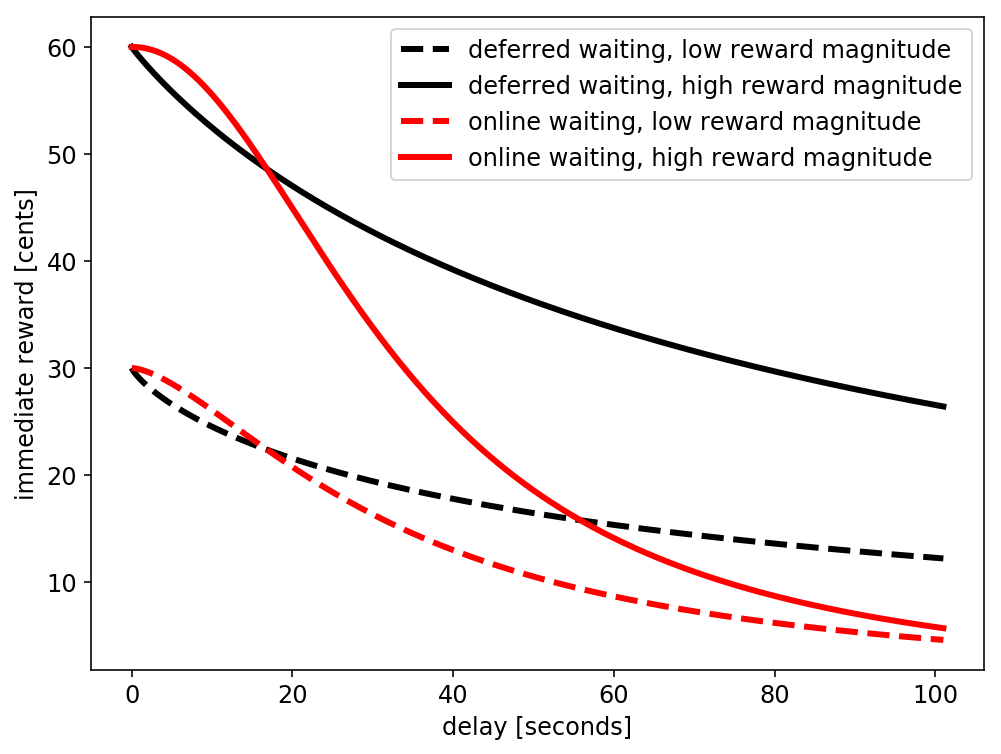

In [49]:
# Experiment 1
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

paradigms = ['deferred', 'online']
reward_mags = ['low', 'high']

for paradigm in paradigms:
    for reward_mag in reward_mags:
        
        if paradigm is 'online':
            col = 'r'
        else:
            col = 'k'
            
        if reward_mag is 'low':
            RB = 30
            ls = '--'
        else:
            RB = 60
            ls = '-'
            
        label_text = f'{paradigm} waiting, {reward_mag} reward magnitude'
        
        logk = expt1.loc[(expt1['paradigm'] == paradigm) 
                         & (expt1['reward_mag'] == reward_mag)]['logk'].values
        logk = np.mean(logk)
        
        logs = expt1.loc[(expt1['paradigm'] == paradigm) 
                         & (expt1['reward_mag'] == reward_mag)]['logs'].values
        logs = np.mean(logs)
        
        print(np.exp(logk), np.exp(logs))
        

        
        ax.plot(delays, 
            RB*discount_function(delays, np.exp(logk), np.exp(logs)),
            c=col, linewidth=3, ls=ls, label=label_text)

ax.legend()

ax.set(xlabel='delay [seconds]', 
       ylabel='immediate reward [cents]');

plt.savefig(f'{out_dir}expt1_group_df_plot.pdf', bbox_inches='tight')

0.011280789980029463 0.8044079137234598
0.006362442468111062 1.27240679408269
0.045449936974439734 1.955130789702173
0.017406160048135135 2.2227343713520447


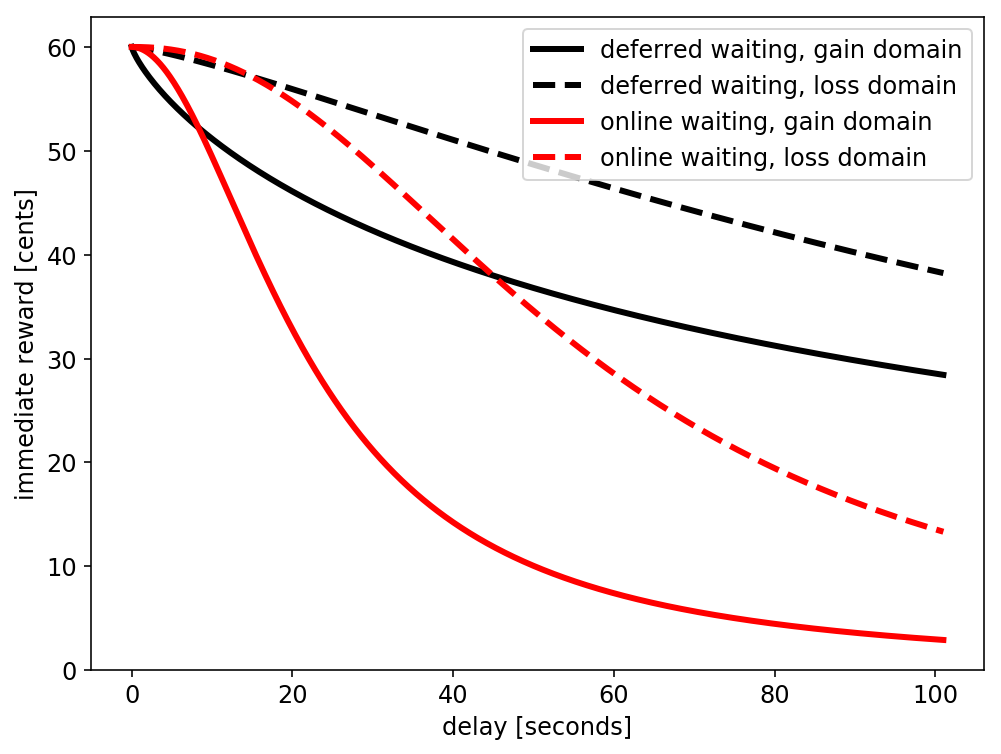

In [51]:
# Experiment 2
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

paradigms = ['deferred', 'online']
domains = ['gain', 'loss']

for paradigm in paradigms:
    for domain in domains:
        
        if paradigm is 'online':
            col = 'r'
        else:
            col = 'k'
            
        if domain is 'gain':
            RB = 60
            ls = '-'
        else:
            RB = 60
            ls = '--'
            
        label_text = f'{paradigm} waiting, {domain} domain'
        
        logk = expt2.loc[(expt2['paradigm'] == paradigm) 
                         & (expt2['domain'] == domain)]['logk'].values
        logk = np.mean(logk)
        
        logs = expt2.loc[(expt2['paradigm'] == paradigm) 
                         & (expt2['domain'] == domain)]['logs'].values
        logs = np.mean(logs)
        
        print(np.exp(logk), np.exp(logs))
        

        
        ax.plot(delays, 
            RB*discount_function(delays, np.exp(logk), np.exp(logs)),
            c=col, linewidth=3, ls=ls, label=label_text)

ax.legend()

ax.set(xlabel='delay [seconds]', 
       ylabel='immediate reward [cents]');

plt.savefig(f'{out_dir}expt2_group_df_plot.pdf', bbox_inches='tight')

## Plot parameter distributions by Experiment and condition

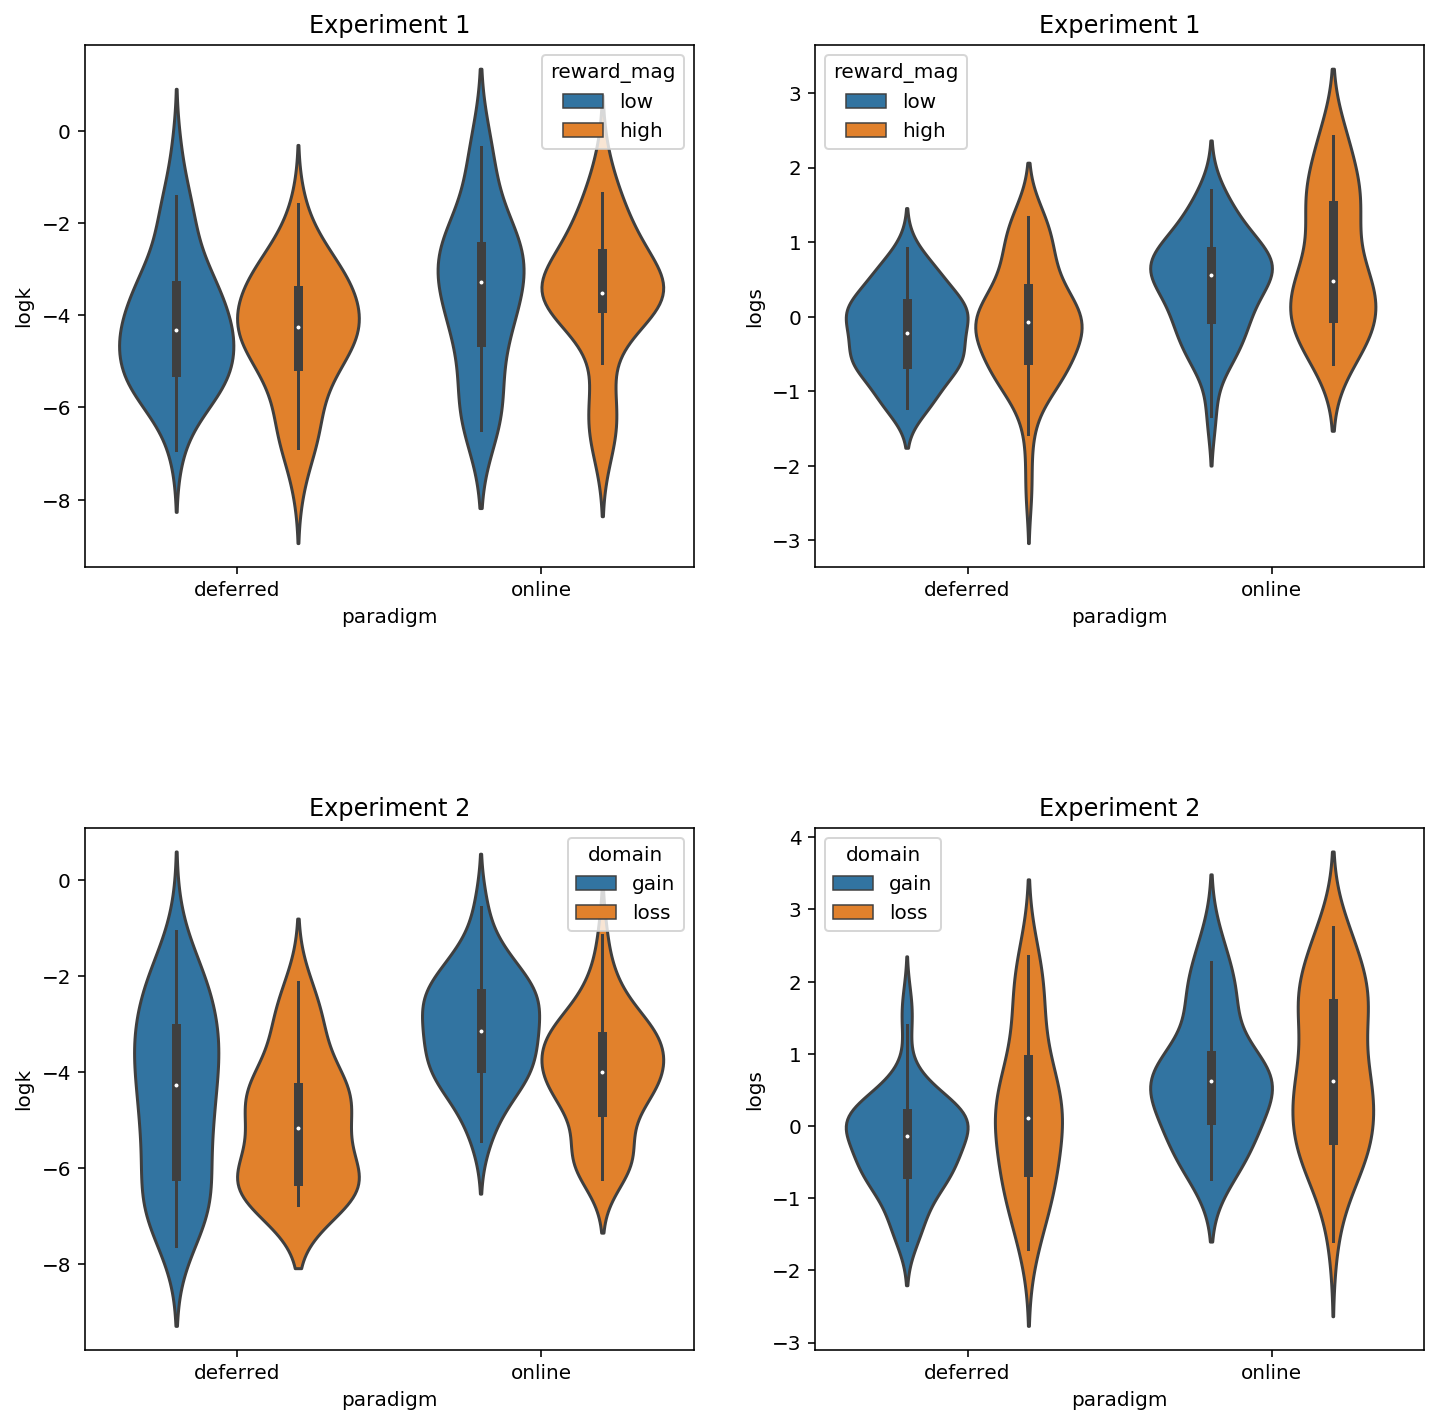

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Experiment 1
sns.violinplot(x="paradigm", hue="reward_mag", y="logk", data=expt1, ax=ax[0,0], size=6)
ax[0,0].set(title="Experiment 1")

sns.violinplot(x="paradigm", hue="reward_mag", y="logs", data=expt1, ax=ax[0,1], size=6)
ax[0,1].set(title="Experiment 1")

# Experiment 2
sns.violinplot(x="paradigm", hue="domain", y="logk", data=expt2, ax=ax[1,0], size=6)
ax[1,0].set(title="Experiment 2")

sns.violinplot(x="paradigm", hue="domain", y="logs", data=expt2, ax=ax[1,1], size=6)
ax[1,1].set(title="Experiment 2")

# increase spacing
plt.subplots_adjust(hspace=0.5)

plt.savefig('output/parameter visualisation by expt and condition.pdf', bbox_inches='tight')

We want to test the hypothesis that $\log(s)=0$ for all description paradigm data in Experiment 1. We also want to test $\log(s)=0$ for the description paradigm in Experiment 2. So we need to export this to analyse in JASP.

In [6]:
# expt 1
expt1_deferred_logs = (expt1.loc[expt1['paradigm'] == "deferred"]["logs"]
                            .to_frame()
                            .rename({'logs': 'Experiment 1 deferred'}, axis='columns')
                            .reset_index(drop=True))

expt1_online_logs = (expt1.loc[expt1['paradigm'] == "online"]["logs"]
                          .to_frame()
                          .rename({'logs': 'Experiment 1 online'}, axis='columns')
                          .reset_index(drop=True))

# expt 2
expt2_deferred_logs = (expt2.loc[expt2['paradigm'] == "deferred"]["logs"]
                            .to_frame()
                            .rename({'logs': 'Experiment 2 deferred'}, axis='columns')
                            .reset_index(drop=True))

expt2_online_logs = (expt2.loc[expt2['paradigm'] == "online"]["logs"]
                          .to_frame()
                          .rename({'logs': 'Experiment 2 online'}, axis='columns')
                          .reset_index(drop=True))

# Note that this will be a ragged array in that we have different numbers of 
# participants in the description and experience conditions in each experiment.
# So there will be some missing values at the bottom of some columns.
logs_data = pd.concat([expt1_deferred_logs, expt1_online_logs,
                       expt2_deferred_logs, expt2_online_logs], axis=1)

In [7]:
logs_data.to_csv('analysis/logs_values.csv')